<a href="https://colab.research.google.com/github/nehaa28/JulyTask/blob/main/part_5_UsingMLFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementation of Activation functions and Weight initialization using MLFlow

In [1]:
!pip install mlflow -q
!pip install tensorflow

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
from tensorflow.keras import initializers
from tensorflow.python.keras import activations

print(tf.__version__)

# downloading fashion_mnist data
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0

test_images = test_images / 255.0              


import mlflow.tensorflow
mlflow.tensorflow.autolog()

2.5.0


## ACTIVATION FUNCTIONS:

In [3]:
#RELU
activation = tf.keras.activations.relu

model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(300, activation=activation),
tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary() # model summary

with mlflow.start_run():
    model.fit(train_images, train_labels, epochs=10)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    print('test_loss', test_loss)
    print('test_accuracy', test_acc)

    mlflow.tensorflow.mlflow.log_metric('test_loss', test_loss)
    mlflow.tensorflow.mlflow.log_metric('test_acc', test_acc)  
    mlflow.tensorflow.mlflow.log_param('initializer',model.layers[1].kernel_initializer)
    mlflow.tensorflow.mlflow.log_param('activation', activation)

del model


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4787 - accuracy: 0.8290
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3628 - accuracy: 0.8668
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3237 - accuracy: 0.8813
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss

In [4]:
#softmax
activation = tf.keras.activations.softmax

model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(300, activation=activation),
tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()# model summary

with mlflow.start_run():
    model.fit(train_images, train_labels, epochs=10)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

    print('test_loss', test_loss)
    print('test_accuracy', test_acc)

    mlflow.tensorflow.mlflow.log_metric('test_loss', test_loss)
    mlflow.tensorflow.mlflow.log_metric('test_acc', test_acc)  
    mlflow.tensorflow.mlflow.log_param('initializer', model.layers[1].kernel_initializer)
    mlflow.tensorflow.mlflow.log_param('activation', activation)
    
del model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3931 - accuracy: 0.6340
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8288 - accuracy: 0.6780
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7185 - accuracy: 0.7020
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - lo

In [5]:
activation = tf.keras.activations.sigmoid

model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(300, activation=activation),
tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()# model summary

with mlflow.start_run():
    model.fit(train_images, train_labels, epochs=10)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

    print('test_loss', test_loss)
    print('test_accuracy', test_acc)

    mlflow.tensorflow.mlflow.log_metric('test_loss', test_loss)
    mlflow.tensorflow.mlflow.log_metric('test_acc', test_acc)  
    mlflow.tensorflow.mlflow.log_param('initializer', model.layers[1].kernel_initializer)
    mlflow.tensorflow.mlflow.log_param('activation', activation)

del model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5136 - accuracy: 0.8191
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3861 - accuracy: 0.8600
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3472 - accuracy: 0.8728
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - lo

In [6]:
#tanh
activation = tf.keras.activations.tanh

model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(300, activation=activation),
tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()# model summary

with mlflow.start_run():
    model.fit(train_images, train_labels, epochs=10)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

    print('test_loss', test_loss)
    print('test_accuracy', test_acc)

    mlflow.tensorflow.mlflow.log_metric('test_loss', test_loss)
    mlflow.tensorflow.mlflow.log_metric('test_acc', test_acc)  
    mlflow.tensorflow.mlflow.log_param('initializer', model.layers[1].kernel_initializer)
    mlflow.tensorflow.mlflow.log_param('activation', activation)

del model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4721 - accuracy: 0.8291
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3685 - accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3324 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - lo

In [7]:
#selu
activation = tf.keras.activations.selu

model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(300, activation=activation),
tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()# model summary

with mlflow.start_run():
    model.fit(train_images, train_labels, epochs=10)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

    print('test_loss', test_loss)
    print('test_accuracy', test_acc)

    mlflow.tensorflow.mlflow.log_metric('test_loss', test_loss)
    mlflow.tensorflow.mlflow.log_metric('test_acc', test_acc)  
    mlflow.tensorflow.mlflow.log_param('initializer', model.layers[1].kernel_initializer)
    mlflow.tensorflow.mlflow.log_param('activation', activation)
    
del model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5013 - accuracy: 0.8231
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3931 - accuracy: 0.8571
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3550 - accuracy: 0.8687
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - lo

#With Weight Initializer

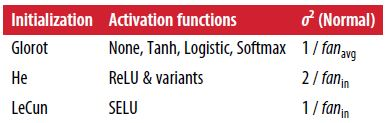

In [8]:
#relu + he_normal
activation = tf.keras.activations.relu
initializer = tf.keras.initializers.he_normal

model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(300, activation=activation, kernel_initializer=initializer),
tf.keras.layers.Dense(10,kernel_initializer=initializer)
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()# model summary

with mlflow.start_run():
    model.fit(train_images, train_labels, epochs=10)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

    print('test_loss', test_loss)
    print('test_accuracy', test_acc)

    mlflow.tensorflow.mlflow.log_metric('test_loss', test_loss)
    mlflow.tensorflow.mlflow.log_metric('test_acc', test_acc)  
    mlflow.tensorflow.mlflow.log_param('activation', activation)
    mlflow.tensorflow.mlflow.log_param('initializer',model.layers[1].kernel_initializer)

del model

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4787 - accuracy: 0.8292
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3602 - accuracy: 0.8687
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3254 - accuracy: 0.8806
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - lo

In [9]:
#softmax+glorot_normal
activation = tf.keras.activations.softmax
initializer = tf.keras.initializers.glorot_normal

model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation=activation, kernel_initializer=initializer),
tf.keras.layers.Dense(10,kernel_initializer=initializer)
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()# model summary

with mlflow.start_run():
    model.fit(train_images, train_labels, epochs=10)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

    print('test_loss', test_loss)
    print('test_accuracy', test_acc)

    mlflow.tensorflow.mlflow.log_metric('test_loss', test_loss)
    mlflow.tensorflow.mlflow.log_metric('test_acc', test_acc)  
    mlflow.tensorflow.mlflow.log_param('activation', activation)
    mlflow.tensorflow.mlflow.log_param('initializer',model.layers[1].kernel_initializer)
    
del model

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3178 - accuracy: 0.7123
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7153 - accuracy: 0.7508
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6066 - accuracy: 0.7571
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - lo

In [10]:
#sigmoid + glorot_mormal
initializer = tf.keras.initializers.glorot_normal
activation = tf.keras.activations.sigmoid

model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation=activation, kernel_initializer=initializer),
tf.keras.layers.Dense(10,kernel_initializer=initializer)
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()# model summary

with mlflow.start_run():
    model.fit(train_images, train_labels, epochs=10)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

    print('test_loss', test_loss)
    print('test_accuracy', test_acc)

    mlflow.tensorflow.mlflow.log_metric('test_loss', test_loss)
    mlflow.tensorflow.mlflow.log_metric('test_acc', test_acc)  
    mlflow.tensorflow.mlflow.log_param('activation', activation)
    mlflow.tensorflow.mlflow.log_param('initializer',model.layers[1].kernel_initializer)
    
del model

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5425 - accuracy: 0.8139
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3923 - accuracy: 0.8591
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3552 - accuracy: 0.8713
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - lo

In [11]:
#tanh + glorot_normal
initializer = tf.keras.initializers.glorot_normal
activation = tf.keras.activations.tanh

model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(300, activation=activation, kernel_initializer=initializer),
tf.keras.layers.Dense(10,kernel_initializer=initializer)
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()# model summary

with mlflow.start_run():
    model.fit(train_images, train_labels, epochs=10)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

    print('test_loss', test_loss)
    print('test_accuracy', test_acc)

    mlflow.tensorflow.mlflow.log_metric('test_loss', test_loss)
    mlflow.tensorflow.mlflow.log_metric('test_acc', test_acc)  
    mlflow.tensorflow.mlflow.log_param('activation', activation)
    mlflow.tensorflow.mlflow.log_param('initializer',model.layers[1].kernel_initializer)
    
del model

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4702 - accuracy: 0.8304
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3680 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3308 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - lo